<a href="https://colab.research.google.com/github/Rishita32/Data_Science_Lab/blob/main/RishitaMote_Exp8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Rishita Mote

Class: BE COMPS

Batch: B

UID: 2018130029

# CEEL 82B, Data Science, 2022
# Lab 8: Support Vector Machine


**Objective**: Understanding Support Vector Machine algorithm through building SVM algorithm in Python

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc, classification_report

from prettytable import PrettyTable

import os

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# We'll define a function to draw a nice plot of an SVM
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

# 1. Support Vector Machines

Use the  SVC  module from the  sklearn.svm  package to demonstrate the support vector classifier and the SVM

In [ ]:
from sklearn.svm import SVC

# 2. Support vector Classifier

The  SVC()  function can be used to fit a support vector classifier when the argument kernel="linear"  is used. This function uses a slightly different formulation of the equations we saw in lecture to build the support vector classifier. The  c  argument allows us to specify the cost of a violation to the margin. When the  c  argument is small, then the margins will be wide and many support vectors will be on the margin or will violate the margin. When the  c  argument is large, then the margins will be narrow and there will be few support vectors on the margin or violating the margin.

We can use the  SVC()  function to fit the support vector classifier for a given value of the  cost  parameter. Here we demonstrate the use of this function on a two-dimensional example so that we can plot the resulting decision boundary. Let's start by generating a set of observations, which belong to two classes:

In [ ]:
# Generating random data: 20 observations of 2 features and divide into two classes.
np.random.seed(5)
X = np.random.randn(20,2)
y = np.repeat([1,-1], 10)

X[y == -1] = X[y == -1]+1

Let's plot the data to see whether the classes are linearly separable:

Text(0, 0.5, 'X2')

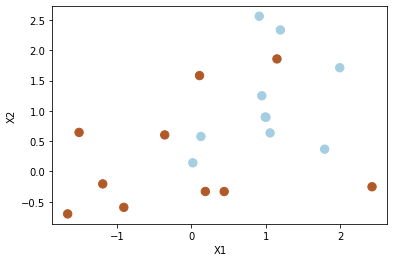

In [ ]:
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

Linear or Non Linear?

From the above plot, we can see that the classes are not linearly separable

Nope; not linear. Next, we fit the support vector classifier:

In [ ]:
svc = SVC(C=1, kernel='linear')
svc.fit(X, y)

SVC(C=1, kernel='linear')

We can now plot the support vector classifier by calling the  plot_svc()  function on the output of the call to  SVC() , as well as the data used in the call to  SVC() :

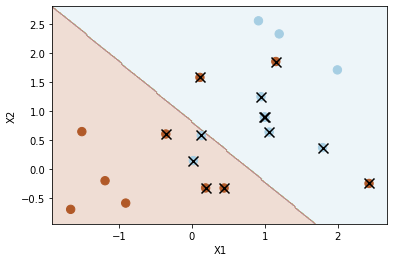

Number of support vectors:  13


In [ ]:
plot_svc(svc, X, y)


In [ ]:
svc.support_

array([10, 11, 13, 14, 15, 16, 17,  0,  1,  2,  4,  6,  8], dtype=int32)

In [ ]:
svc.support_vectors_

array([[ 0.01939211,  0.14314685],
       [ 0.12812082,  0.57749207],
       [ 1.05914424,  0.63668912],
       [ 1.00328884,  0.89406956],
       [ 1.79305332,  0.36842837],
       [ 0.99380509,  0.89893239],
       [ 0.94769185,  1.24921766],
       [ 0.44122749, -0.33087015],
       [ 2.43077119, -0.25209213],
       [ 0.10960984,  1.58248112],
       [ 0.18760323, -0.32986996],
       [-0.35882895,  0.6034716 ],
       [ 1.15139101,  1.85733101]])

In [ ]:
len(svc.support_vectors_)

13

Number of Support vectors?

Ans: 13


The region of feature space that will be assigned to the −1 class is shown in light blue, and the region that will be assigned to the +1 class is shown in brown. The decision boundary between the two classes is linear (because we used the argument  kernel="linear" ).

The support vectors are plotted with crosses and the remaining observations are plotted as circles; we see here that there are 13 support vectors. We can determine their identities as follows:

What if we instead used a smaller value of the  cost  parameter?

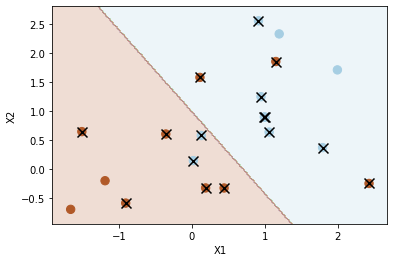

Number of support vectors:  16


In [ ]:
svc2 = SVC(C=0.1, kernel='linear')
svc2.fit(X, y)
plot_svc(svc2, X, y)

In [ ]:
svc2.support_

array([10, 11, 13, 14, 15, 16, 17, 19,  0,  1,  2,  3,  4,  6,  8,  9],
      dtype=int32)

In [ ]:
svc2.support_vectors_

array([[ 0.01939211,  0.14314685],
       [ 0.12812082,  0.57749207],
       [ 1.05914424,  0.63668912],
       [ 1.00328884,  0.89406956],
       [ 1.79305332,  0.36842837],
       [ 0.99380509,  0.89893239],
       [ 0.94769185,  1.24921766],
       [ 0.91312439,  2.56153229],
       [ 0.44122749, -0.33087015],
       [ 2.43077119, -0.25209213],
       [ 0.10960984,  1.58248112],
       [-0.9092324 , -0.59163666],
       [ 0.18760323, -0.32986996],
       [-0.35882895,  0.6034716 ],
       [ 1.15139101,  1.85733101],
       [-1.51117956,  0.64484751]])

In [ ]:
len(svc2.support_vectors_)

16

Number of support vectors?

Ans - 16

Now that a smaller value of the c parameter is being used, we obtain a larger number of support vectors, because the margin is now wider.

The  sklearn.grid_search  module includes a function  GridSearchCV() to perform cross-validation. In order to use this function, we pass in relevant information about the set of models that are under consideration. The following command indicates that we want perform 10-fold cross-validation to compare SVMs with a linear kernel, using a range of values of the cost parameter:

In [ ]:
from sklearn.model_selection import GridSearchCV

# Select the optimal C parameter by cross-validation
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             scoring='accuracy')

We can easily access the cross-validation errors for each of these models:

In [ ]:
clf.cv_results_

{'mean_fit_time': array([0.00101609, 0.00056303, 0.00054889, 0.00060418, 0.00057747,
        0.00061343, 0.00074451]),
 'mean_score_time': array([0.00050826, 0.0003217 , 0.00031543, 0.0003608 , 0.00031838,
        0.00032215, 0.00032949]),
 'mean_test_score': array([0.8 , 0.8 , 0.8 , 0.75, 0.75, 0.75, 0.75]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'rank_test_score': array([1, 1, 1, 4, 4, 4, 4], dtype=int32),
 'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split1_test_score': array([0.5, 0.5, 0.5, 0. , 0. , 0. , 0. ]),
 'split2_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split3_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split4_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split5_test_sc

The  GridSearchCV()  function stores the best parameters obtained, which can be accessed as follows:

In [ ]:
clf.best_params_

{'C': 0.001}

c=0.001 is best according to GridSearchCV.

We can see the best score of the grid search model as follows:

In [ ]:
clf.best_score_

0.8

As usual, the  predict()  function can be used to predict the class label on a set of test observations, at any given value of the cost parameter. Let's generate a test data set:

In [ ]:
np.random.seed(1)
X_test = np.random.randn(20,2)
y_test = np.random.choice([-1,1], 20)
X_test[y_test == 1] = X_test[y_test == 1]-1

Now we predict the class labels of these test observations. Here we use the best model obtained through cross-validation in order to make predictions:

In [ ]:
svc2 = SVC(C=0.001, kernel='linear', probability=True)
svc2.fit(X, y)

y_pred = svc2.predict(X_test)

### Accuracy

In [ ]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy - ", round(acc*100,4))

Accuracy -  70.0


### Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm, index=svc2.classes_, columns=svc2.classes_)

,-1,1
-1,2,6
1,0,12


With this value of  c , 14 of the test observations are correctly classified.

### Specificity

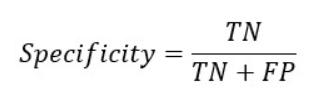

In [ ]:
specificity = cm[0,0]/(cm[0,0]+cm[0,1]) * 100
print('Specificity: ', round(specificity, 4), "%")

Specificity:  25.0 %


### Sensitivity

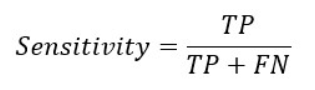

In [ ]:
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1]) * 100
print('Sensitivity: ', round(sensitivity, 4), "%")

Sensitivity:  100.0 %


### Classification Report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.25      0.40         8
           1       0.67      1.00      0.80        12

    accuracy                           0.70        20
   macro avg       0.83      0.62      0.60        20
weighted avg       0.80      0.70      0.64        20



### ROC Curve and AUC

In [ ]:
y_prob = svc2.predict_proba(X_test)

y_prob = y_prob[:, 1]

n_classes = len(svc2.classes_)

fpr, tpr,_ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

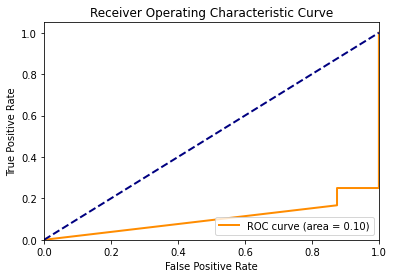

In [ ]:
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()

Now consider a situation in which the two classes are linearly separable. Then we can find a separating hyperplane using the  svm()  function. First we'll give our simulated data a little nudge so that they are linearly separable:

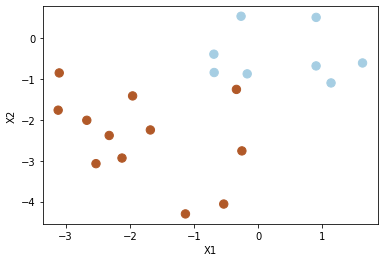

In [ ]:
X_test[y_test == 1] = X_test[y_test == 1] -1
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Now the observations are linearly separable. We fit the support vector classifier and plot the resulting hyperplane, using a very large value of  cost  so that no observations are misclassified.

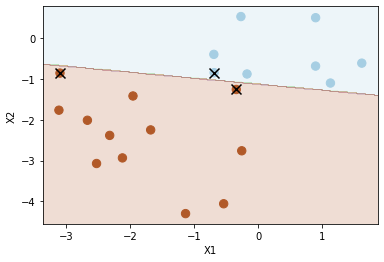

Number of support vectors:  3


In [ ]:
svc3 = SVC(C=1e5, kernel='linear')
svc3.fit(X_test, y_test)
plot_svc(svc3, X_test, y_test)

Number of support vectors?

Ans: 3

No training errors were made and only three support vectors were used. However, we can see from the figure that the margin is very narrow (because the observations that are not support vectors, indicated as circles, are very close to the decision boundary). It seems likely that this model will perform poorly on test data. Let's try a smaller value of  cost :

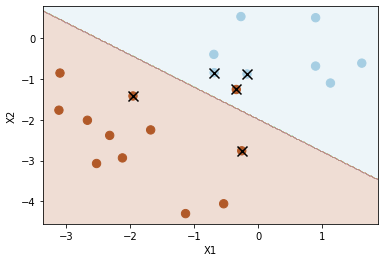

Number of support vectors:  5


In [ ]:
svc4 = SVC(C=1, kernel='linear')
svc4.fit(X_test, y_test)
plot_svc(svc4, X_test, y_test)

Using  cost = 1 , we misclassify a training observation, but we also obtain a much wider margin and make use of five support vectors. It seems likely that this model will perform better on test data than the model with  cost=1e5 .

# Support Vector Machine

In order to fit an SVM using a non-linear kernel, we once again use the  SVC()  function. However, now we use a different value of the parameter kernel. To fit an SVM with a polynomial kernel we use  kernel="poly" , and to fit an SVM with a radial kernel we use  kernel="rbf" . In the former case we also use the  degree  argument to specify a degree for the polynomial kernel, and in the latter case we use  gamma  to specify a value of  γ  for the radial basis kernel.

Let's generate some data with a non-linear class boundary:

Text(0, 0.5, 'X2')

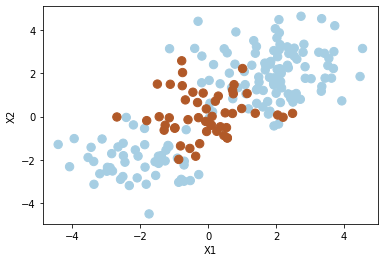

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=2)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

We can see that one class is kind of stuck in the middle of another class. This suggests that we might want to use a radial kernel in our SVM. Now let's fit the training data using the  SVC()  function with a radial kernel and  γ=1 :

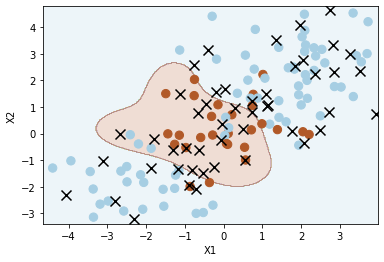

Number of support vectors:  51


In [ ]:
svm = SVC(C=1.0, kernel='rbf', gamma=1) 
svm.fit(X_train, y_train)

plot_svc(svm, X_test, y_test)

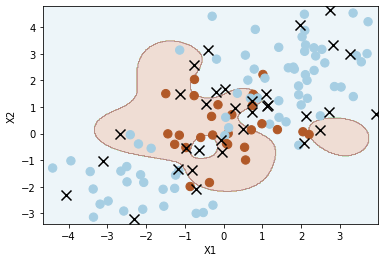

Number of support vectors:  36


In [ ]:
# Increasing C parameter, allowing more flexibility 
svm2 = SVC(C=100, kernel='rbf', gamma=1.0) 
svm2.fit(X_train, y_train)

plot_svc(svm2, X_test, y_test)

In [ ]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],'gamma': [0.5, 1,2,3,4]}]

clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)

clf.best_params_

{'C': 10, 'gamma': 0.5}

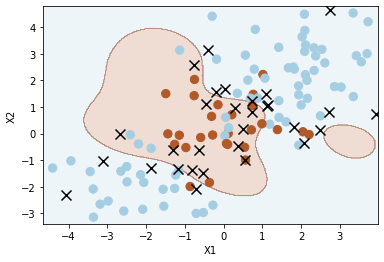

Number of support vectors:  32
[[66  7]
 [ 6 21]]


In [ ]:
plot_svc(clf.best_estimator_, X_test, y_test) 
print(confusion_matrix(y_test, clf.best_estimator_.predict(X_test))) 


In [ ]:
print(clf.best_estimator_.score(X_test, y_test))

0.87


In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

In [ ]:
# More constrained model
svm3 = SVC(C=1, kernel='rbf', gamma=1)
svm3.fit(X_train, y_train)

SVC(C=1, gamma=1)

In [ ]:
# More flexible model
svm4 = SVC(C=1, kernel='rbf', gamma=50)
svm4.fit(X_train, y_train)

SVC(C=1, gamma=50)

In [ ]:
y_train_score3 = svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)

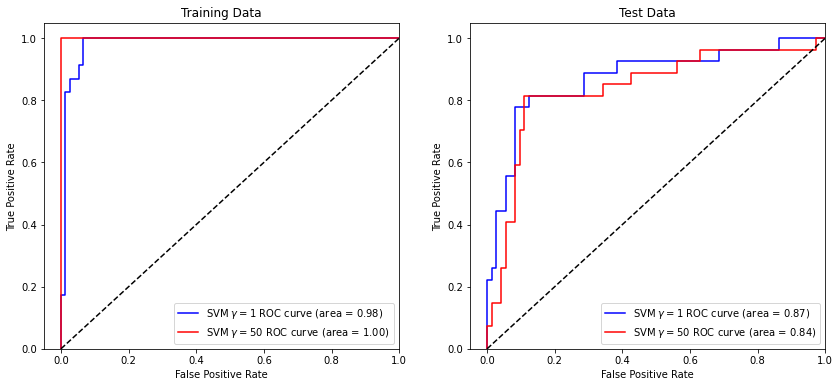

In [ ]:
y_train_score3 = svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_train, y_train_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_train, y_train_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax1.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax1.set_title('Training Data')

y_test_score3 = svm3.decision_function(X_test)
y_test_score4 = svm4.decision_function(X_test)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_test, y_test_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_test, y_test_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

ax2.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax2.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax2.set_title('Test Data')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")

#SVM with Multiple Classes

Text(0, 0.5, 'XX2')

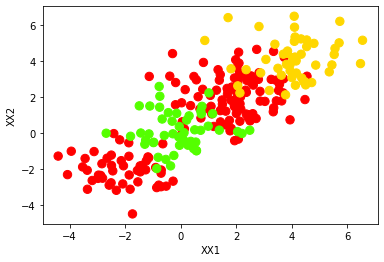

In [ ]:
np.random.seed(8)
XX = np.vstack([X, np.random.randn(50,2)])
yy = np.hstack([y, np.repeat(0,50)])
XX[yy ==0] = XX[yy == 0] +4

plt.scatter(XX[:,0], XX[:,1], s=70, c=yy, cmap=plt.cm.prism)
plt.xlabel('XX1')
plt.ylabel('XX2')

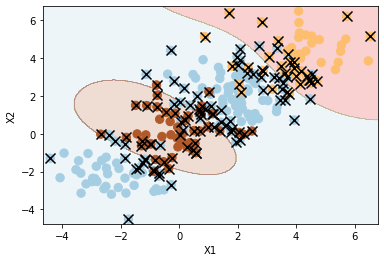

Number of support vectors:  128


In [ ]:
svm5 = SVC(C=1, kernel='rbf')
svm5.fit(XX, yy)
plot_svc(svm5, XX, yy)

# Pulsar Classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
pulsar_data = pd.read_csv('/content/drive/MyDrive/Data Science/Lab/Pulsar.csv')

Mounted at /content/drive


In [ ]:
pulsar_data

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [ ]:
pulsar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mean_Integrated       17898 non-null  float64
 1   SD                    17898 non-null  float64
 2   EK                    17898 non-null  float64
 3   Skewness              17898 non-null  float64
 4   Mean_DMSNR_Curve      17898 non-null  float64
 5   SD_DMSNR_Curve        17898 non-null  float64
 6   EK_DMSNR_Curve        17898 non-null  float64
 7   Skewness_DMSNR_Curve  17898 non-null  float64
 8   Class                 17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [ ]:
pulsar_data.isna().sum()

Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
dtype: int64

We can see that there are no null values present in the dataset.

In [ ]:
X = pulsar_data.drop(columns = ['Class'], axis=1)

Y = pulsar_data['Class']

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

##Baseline Model

In [ ]:
svc_model = SVC(probability=True)
svc_model.fit(X_train, y_train)

pulsar_y_pred = svc_model.predict(X_test)

### Accuracy

In [ ]:
pulsar_acc = accuracy_score(y_test, pulsar_y_pred)
print("Accuracy - ", round(pulsar_acc*100,4))

Accuracy -  97.2253


### Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, pulsar_y_pred)
pd.DataFrame(cm, index=svc2.classes_, columns=svc2.classes_)

,-1,1
-1,4844,24
1,125,377


### Specificity

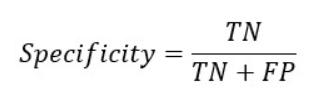

In [ ]:
specificity = cm[0,0]/(cm[0,0]+cm[0,1]) * 100
print('Specificity: ', round(specificity, 4), "%")

Specificity:  99.507 %


### Sensitivity

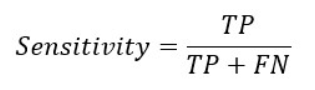

In [ ]:
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1]) * 100
print('Sensitivity: ', round(sensitivity, 4), "%")

Sensitivity:  75.0996 %


### Classification Report

In [ ]:
print(classification_report(y_test, pulsar_y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4868
           1       0.94      0.75      0.83       502

    accuracy                           0.97      5370
   macro avg       0.96      0.87      0.91      5370
weighted avg       0.97      0.97      0.97      5370



### ROC Curve and AUC

In [ ]:
y_prob = svc_model.predict_proba(X_test)

y_prob = y_prob[:, 1]

n_classes = len(svc2.classes_)

fpr, tpr,_ = roc_curve(y_test, y_prob)
pulsar_roc_auc = auc(fpr, tpr)

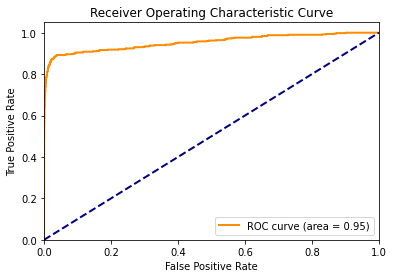

In [ ]:
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % pulsar_roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()

##Radial Kernal

In [ ]:
# Select the optimal parameters by cross-validation
pulsar_tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]
                     }]
pulsar_clf = GridSearchCV(SVC(kernel = 'linear'), pulsar_tuned_parameters, cv=10, scoring='accuracy')
pulsar_clf.fit(X, Y)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             scoring='accuracy')

In [ ]:
pulsar_clf.best_params_

{'C': 1}

In [ ]:
svc_model_rbf = SVC(probability=True,**pulsar_clf.best_params_, kernel='rbf' )
svc_model_rbf.fit(X_train, y_train)

pulsar_y_pred_rbf = svc_model_rbf.predict(X_test)

In [ ]:
svc_model_rbf.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

##Accuracy

In [ ]:
pulsar_acc_rbf = accuracy_score(y_test, pulsar_y_pred_rbf)
print("Accuracy (Radial Kernel) - ", round(pulsar_acc_rbf*100,4))

Accuracy (Radial Kernel) -  97.2253


##Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, pulsar_y_pred_rbf)
pd.DataFrame(cm, index=svc_model_rbf.classes_, columns=svc_model_rbf.classes_)

,0,1
0,4844,24
1,125,377


##Specificity

In [ ]:
specificity_rbf = cm[0,0]/(cm[0,0]+cm[0,1]) * 100
print('Specificity (Radial Kernel): ', round(specificity_rbf, 4), "%")

Specificity (Radial Kernel):  99.507 %


##Sensitivity

In [ ]:
sensitivity_rbf = cm[1,1]/(cm[1,0]+cm[1,1]) * 100
print('Sensitivity (Radial Kernel): ', round(sensitivity_rbf, 4), "%")

Sensitivity (Radial Kernel):  75.0996 %


##Classification Report

In [ ]:
print(classification_report(y_test, pulsar_y_pred_rbf))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4868
           1       0.94      0.75      0.83       502

    accuracy                           0.97      5370
   macro avg       0.96      0.87      0.91      5370
weighted avg       0.97      0.97      0.97      5370



##ROC Curve and AUC

In [ ]:
y_prob = svc_model_rbf.predict_proba(X_test)

y_prob = y_prob[:, 1]

n_classes = len(svc_model_rbf.classes_)

fpr, tpr,_ = roc_curve(y_test, y_prob)
pulsar_roc_auc_rbf = auc(fpr, tpr)

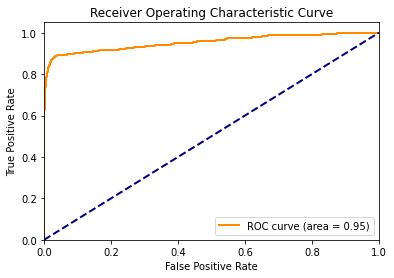

In [ ]:
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % pulsar_roc_auc_rbf,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()

##Linear Kernel

In [ ]:
# Select the optimal parameters by cross-validation
pulsar_tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1]
                     }]
pulsar_clf_linear = GridSearchCV(SVC(kernel = 'linear'), pulsar_tuned_parameters, cv=10, scoring='accuracy')
pulsar_clf_linear.fit(X, Y)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1]}], scoring='accuracy')

In [ ]:
pulsar_clf_linear.best_params_

{'C': 1}

In [ ]:
svc_model_linear = SVC(probability=True,**pulsar_clf_linear.best_params_ , kernel='linear')
svc_model_linear.fit(X_train, y_train)

pulsar_y_pred_linear = svc_model_linear.predict(X_test)

In [ ]:
svc_model_linear.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

##Accuracy

In [ ]:
pulsar_acc_linear = accuracy_score(y_test, pulsar_y_pred_linear)
print("Accuracy (Linear Kernel) - ", round(pulsar_acc_linear*100,4))

Accuracy (Linear Kernel) -  97.8771


##Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, pulsar_y_pred_linear)
pd.DataFrame(cm, index=svc_model_linear.classes_, columns=svc_model_linear.classes_)

,0,1
0,4844,24
1,90,412


##Specificity

In [ ]:
specificity_linear = cm[0,0]/(cm[0,0]+cm[0,1]) * 100
print('Specificity (Linear Kernel): ', round(specificity_linear, 4), "%")

Specificity (Linear Kernel):  99.507 %


##Sensitivity

In [ ]:
sensitivity_linear = cm[1,1]/(cm[1,0]+cm[1,1]) * 100
print('Sensitivity (Linear Kernel): ', round(sensitivity_linear, 4), "%")

Sensitivity (Linear Kernel):  82.0717 %


##Classification Report

In [ ]:
print(classification_report(y_test, pulsar_y_pred_linear))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4868
           1       0.94      0.82      0.88       502

    accuracy                           0.98      5370
   macro avg       0.96      0.91      0.93      5370
weighted avg       0.98      0.98      0.98      5370



##ROC Curve and AUC

In [ ]:
y_prob = svc_model_linear.predict_proba(X_test)

y_prob = y_prob[:, 1]

n_classes = len(svc_model_linear.classes_)

fpr, tpr,_ = roc_curve(y_test, y_prob)
pulsar_roc_auc_linear = auc(fpr, tpr)

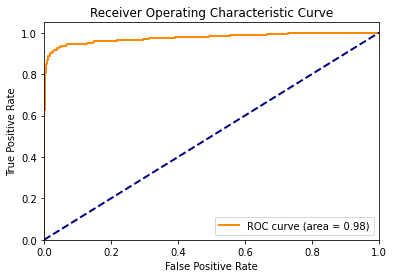

In [ ]:
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % pulsar_roc_auc_linear,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()

##Polynomial Kernel

In [ ]:
pulsar_tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1]
                     }]
pulsar_clf_poly = GridSearchCV(SVC(kernel = 'poly'), pulsar_tuned_parameters, cv=10, scoring='accuracy')
pulsar_clf_poly.fit(X, Y)

GridSearchCV(cv=10, estimator=SVC(kernel='poly'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1]}], scoring='accuracy')

In [ ]:
pulsar_clf_poly.best_params_

{'C': 1}

In [ ]:
svc_model_poly = SVC(probability=True,**pulsar_clf_poly.best_params_, kernel='poly' )
svc_model_poly.fit(X_train, y_train)

pulsar_y_pred_poly = svc_model_poly.predict(X_test)

In [ ]:
svc_model_poly.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

##Accuracy

In [ ]:
pulsar_acc_poly = accuracy_score(y_test, pulsar_y_pred_poly)
print("Accuracy (Polynomial Kernel) - ", round(pulsar_acc_poly*100,4))


Accuracy (Polynomial Kernel) -  97.1695


##Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, pulsar_y_pred_poly)
pd.DataFrame(cm, index=svc_model_poly.classes_, columns=svc_model_poly.classes_)

,0,1
0,4837,31
1,121,381


##Specificity

In [ ]:
specificity_polynomial = cm[0,0]/(cm[0,0]+cm[0,1]) * 100
print('Specificity (Polynomial Kernel): ', round(specificity_polynomial, 4), "%")

Specificity (Polynomial Kernel):  99.3632 %


##Sensitivity

In [ ]:
sensitivity_polynomial = cm[1,1]/(cm[1,0]+cm[1,1]) * 100
print('Sensitivity (Polynomial Kernel): ', round(sensitivity_polynomial, 4), "%")

Sensitivity (Polynomial Kernel):  75.8964 %


##Classification Report

In [ ]:
print(classification_report(y_test, pulsar_y_pred_poly))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4868
           1       0.92      0.76      0.83       502

    accuracy                           0.97      5370
   macro avg       0.95      0.88      0.91      5370
weighted avg       0.97      0.97      0.97      5370



##ROC Curve and AUC

In [ ]:
y_prob = svc_model_poly.predict_proba(X_test)

y_prob = y_prob[:, 1]

n_classes = len(svc_model_poly.classes_)

fpr, tpr,_ = roc_curve(y_test, y_prob)
pulsar_roc_auc_poly = auc(fpr, tpr)

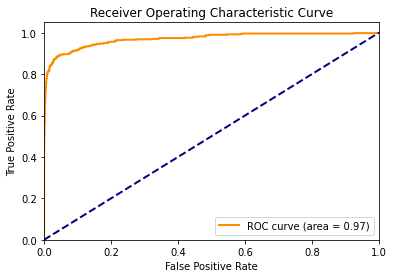

In [ ]:
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % pulsar_roc_auc_poly,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()

##Comparison of Results

In [ ]:
results_table = PrettyTable(['Metric', 'Baseline Model', 'Linear Kernel', 'Polynomial Kernel', 'Radial Kernel'])
results_table.add_row(['Accuracy (%)', round(pulsar_acc*100,4), round(pulsar_acc_linear*100,4), round(pulsar_acc_poly*100,4), round(pulsar_acc_rbf*100,4)  ])
results_table.add_row(['Specificity (%)', round(specificity, 4), round(specificity_linear, 4), round(specificity_polynomial, 4), round(specificity_rbf, 4)  ])
results_table.add_row(['Sensitivity (%)', round(sensitivity, 4), round(sensitivity_linear, 4), round(sensitivity_polynomial, 4), round(sensitivity_rbf, 4) ])
results_table.add_row(['AUC', round(pulsar_roc_auc,2), round(pulsar_roc_auc_linear,2), round(pulsar_roc_auc_poly,2), round(pulsar_roc_auc_rbf,2) ])

print(results_table)

#Observation: We can see from the above table that SVC using linear kernel outperformed other kernel models with accuracy of 97.8595 % and AUC of 0.97

+-----------------+----------------+---------------+-------------------+---------------+
|      Metric     | Baseline Model | Linear Kernel | Polynomial Kernel | Radial Kernel |
+-----------------+----------------+---------------+-------------------+---------------+
|   Accuracy (%)  |    97.2253     |    97.8771    |      97.1695      |    97.2253    |
| Specificity (%) |     99.507     |     99.507    |      99.3632      |     99.507    |
| Sensitivity (%) |    75.0996     |    82.0717    |      75.8964      |    75.0996    |
|       AUC       |      0.95      |      0.98     |        0.97       |      0.95     |
+-----------------+----------------+---------------+-------------------+---------------+


##Conclusion: 
1. In this experiment, I implemented Support Vector Machine algorithm in Python. 
2. I studied and implemented Support Vector Classifier for classifying sythetic dataset that is created randomly. 
3. I understood the effects in resuts by changing the cost value C and kernel.
4. I found out the best parameters by performing hyperparameters tuning using GridSearchCV and used these parameters to train the model and evaluated various metrics such as accuracy, specificity, sensitivity, area under curve, etc.
5. I performed classification of Pulsar dataset using Support Vector Classifier and obtained best accuracy ad AUC using linear kernel.